<a href="https://colab.research.google.com/github/AprilWuWu/AI-Portfolio/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets.mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


ans: 5


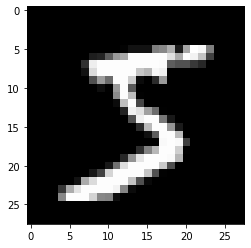

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
idx = 0
print('ans:', y_train[idx])
# _r 反向顏色
# plt.imshow(x_train[idx], cmap='YlOrBr_r')

plt.imshow(x_train[idx], cmap='gray')



In [ ]:
import pandas as pd

pd.DataFrame(x_train[idx])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


---
# 疊模型


In [ ]:
# 28 * 28 (0~255)
# 要拉寬成一個維度，不能是二維
# X1-X784
# 1. 參數正比於難度
# 2. 參數跟資料量有關

In [ ]:
# https://keras.io/api/layers/core_layers/dense/
# 分類 (二元分類: sigmoid) 0~1 , (多元分類: softmax) 加起來=1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 及格分數 bias

layers = [
    # 784(輸入) * 128(神經元) + 128(bias)
    Dense(128, activation='relu', input_dim=784),
    # 1290 = 128(神經元) * 10(神經元) + 10(bias)
    Dense(10, activation='softmax')
]

model = Sequential(layers)
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 確定模型
# loss 確定跟正確答案的距離
# optimizer 優化器
# metrics 有甚麼還想要給別人看的 accuracy:正確率

from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam


model.compile(loss=CategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=['accuracy'])

---
# 資料處理

In [ ]:
# https://keras.io/zh/utils/#to_categorical
from tensorflow.keras.utils import to_categorical

# num_classes 要是給的y_train沒有某一個，one-hot出來會有問題，手動給總共幾個
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# 60000, 28, 28 => 60000, 784
# x_train.reshape(60000, 784)

# -1 讓他自己算
# /255 normalize
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255




In [ ]:
# batch_size: 看幾筆調整一次梯度(平均)下降[20~200]
# validation_split: 切出一部分資料來驗證模型好壞
# epoch: 整份資料要看幾輪
# verbose: 把進度條關掉(2)


# https://keras.io/zh/callbacks/#modelcheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint
save_callback = ModelCheckpoint('minst.h5', save_best_only=True)

# https://keras.io/zh/callbacks/#earlystopping
from tensorflow.keras.callbacks import EarlyStopping
stop_callback = EarlyStopping(patience=5, restore_best_weights=True)


model.fit(x_train_norm,
     y_train_cat,
     batch_size=200,
     validation_split=0.1,
     epochs=50,
     verbose=2,
     callbacks=[save_callback, stop_callback])

# loss 交叉商
# val_ 6000筆沒看過的資料
# accuracy 0.51也算對，所以看了沒用

Epoch 1/50
270/270 - 1s - loss: 0.4239 - accuracy: 0.8834 - val_loss: 0.1841 - val_accuracy: 0.9510
Epoch 2/50
270/270 - 1s - loss: 0.1943 - accuracy: 0.9451 - val_loss: 0.1385 - val_accuracy: 0.9627
Epoch 3/50
270/270 - 1s - loss: 0.1450 - accuracy: 0.9579 - val_loss: 0.1144 - val_accuracy: 0.9700
Epoch 4/50
270/270 - 1s - loss: 0.1146 - accuracy: 0.9666 - val_loss: 0.1059 - val_accuracy: 0.9702
Epoch 5/50
270/270 - 1s - loss: 0.0940 - accuracy: 0.9732 - val_loss: 0.0921 - val_accuracy: 0.9757
Epoch 6/50
270/270 - 1s - loss: 0.0786 - accuracy: 0.9767 - val_loss: 0.0877 - val_accuracy: 0.9755
Epoch 7/50
270/270 - 1s - loss: 0.0671 - accuracy: 0.9811 - val_loss: 0.0813 - val_accuracy: 0.9758
Epoch 8/50
270/270 - 1s - loss: 0.0583 - accuracy: 0.9834 - val_loss: 0.0772 - val_accuracy: 0.9767
Epoch 9/50
270/270 - 1s - loss: 0.0502 - accuracy: 0.9861 - val_loss: 0.0786 - val_accuracy: 0.9773
Epoch 10/50
270/270 - 1s - loss: 0.0441 - accuracy: 0.9880 - val_loss: 0.0782 - val_accuracy: 0.9772

In [ ]:
# 驗證完全沒看過的10000筆資料
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0732 - accuracy: 0.9804


[0.07315726578235626, 0.980400025844574]

In [ ]:
# model.save('minst.ht')

from tensorflow.keras.models import load_model
loaded = load_model('minst.h5')

# 不需要: compile
# 可以: fit/evaluate/predict

loaded.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.9804


[0.07315726578235626, 0.980400025844574]

In [ ]:
# sklearn: predict(預測類別) predict_proba(預測機率)
# tensorflow: predict_classes(預測類別) predict(預測機率)
pre = model.predict_classes(x_test_norm)

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre),
       index=[f"{i}(真實)" for i in range(10)],
       columns=[f"{i}(預測)" for i in range(10)])


,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(真實),974,0,0,0,1,1,1,1,2,0
1(真實),0,1123,3,2,0,1,2,0,3,1
2(真實),4,2,1012,1,3,0,2,4,4,0
3(真實),1,0,1,996,0,3,0,5,2,2
4(真實),1,0,2,1,964,0,4,3,1,6
5(真實),2,0,0,6,1,872,6,1,2,2
6(真實),4,2,1,1,6,2,940,0,2,0
7(真實),0,3,8,2,0,0,0,1008,2,5
8(真實),5,0,6,7,5,4,1,5,939,2
9(真實),5,3,0,5,8,4,0,7,1,976


In [ ]:
# tensorflow version
# from tensorflow.math import confusion_matrix
# con_mat = confusion_matrix(labels=y_test, predictions=pre).numpy()
# pd.DataFrame(con_mat)

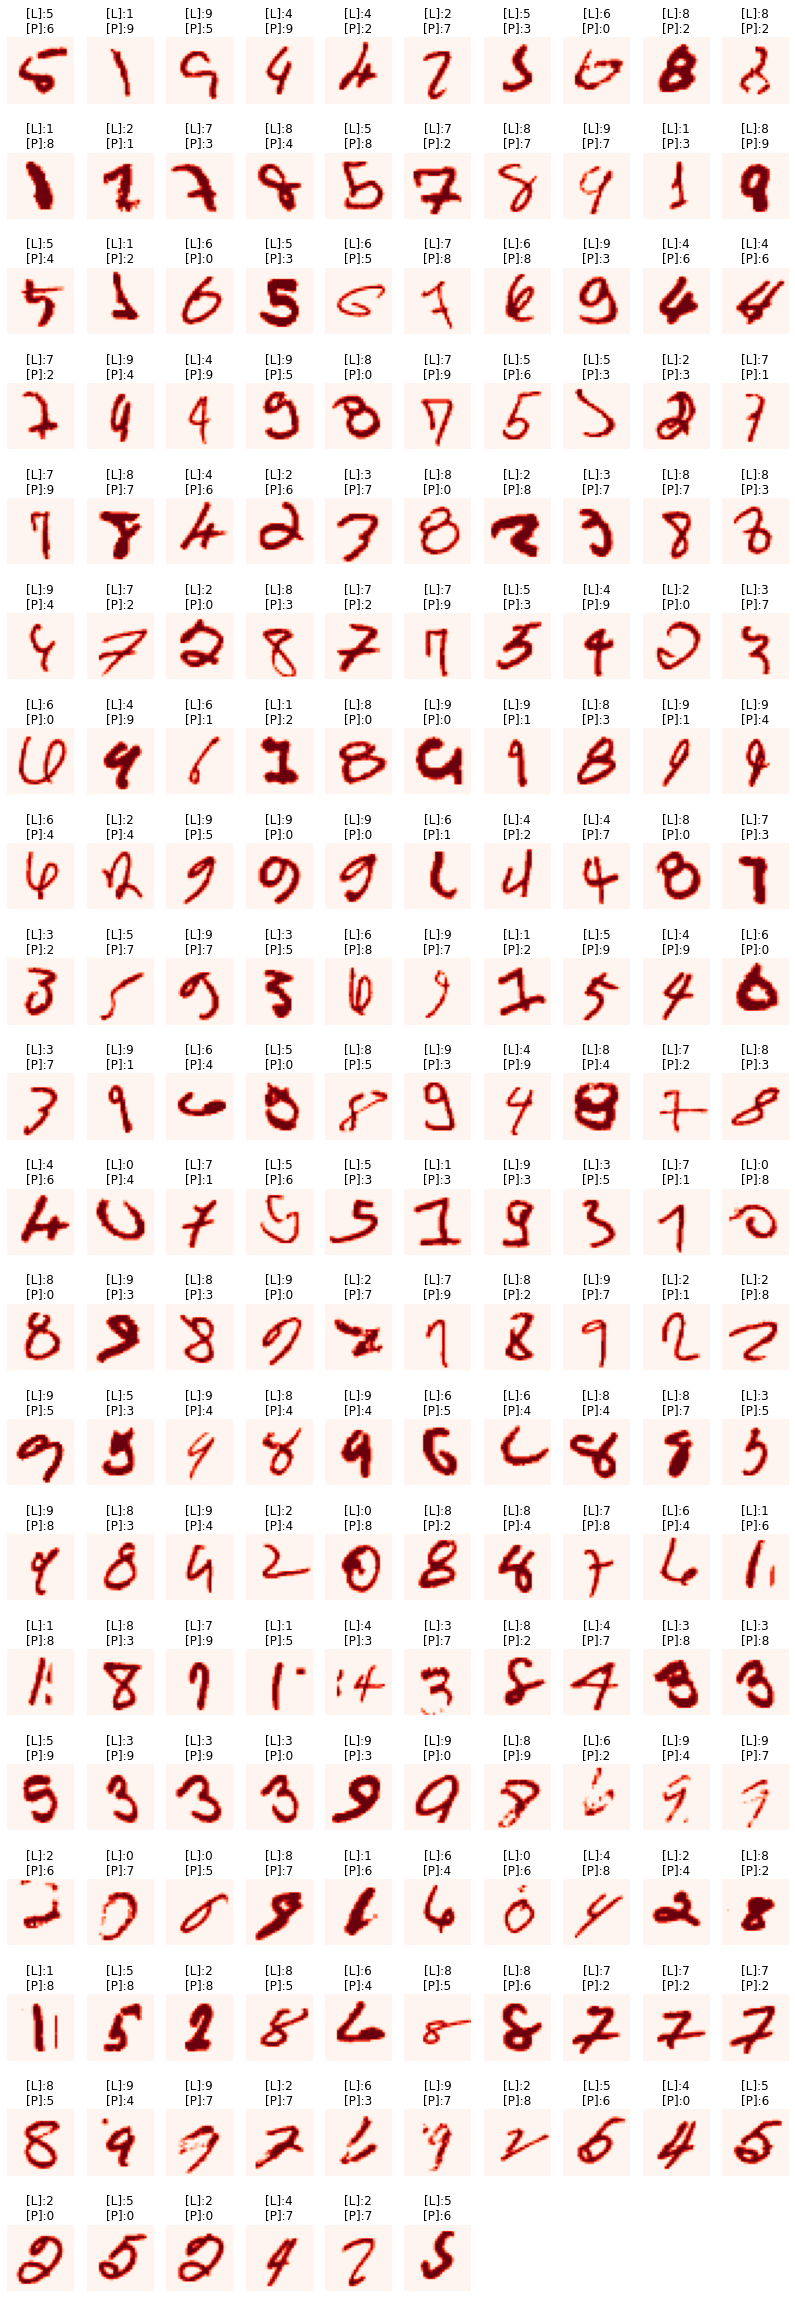

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# 畫布寬高
plt.figure(figsize=(14, 42))

# 找到非0值的位置，他可以比較多維度
idx = np.nonzero(pre != y_test)[0]

width = 10
height = len(idx) // width + 1

for i, d in enumerate(idx):
  img, label, p = x_test[d], y_test[d], pre[d]
  t = f'[L]:{label}\n[P]:{p}'
  plt.subplot(height, width, i+1)
  plt.title(t)
  plt.axis('off')
  plt.imshow(img, cmap='Reds')

0 的機率: 2.1511368e-20
1 的機率: 9.103021e-16
2 的機率: 1.1802102e-09
3 的機率: 1.0
4 的機率: 3.5237722e-17
5 的機率: 1.18394496e-11
6 的機率: 4.103389e-20
7 的機率: 4.4499156e-16
8 的機率: 9.549652e-10
9 的機率: 4.1381545e-15


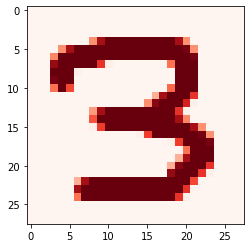

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
# fn = input('檔名:')
fn = 'test.png'
# 轉成灰階 ("L")

img = load_img(fn, target_size=(28, 28)).convert('L')

# 1, 784 跟 784 是不一樣的
img_np = np.array(img).reshape(1, 784) / 255
pre = model.predict(img_np)
pre.shape # (1, 10)  一筆資料10個機率

pre = model.predict(img_np)[0]

for i in range(10):
  print(i, '的機率:', pre[i])
plt.imshow(np.array(img), cmap="Reds")

